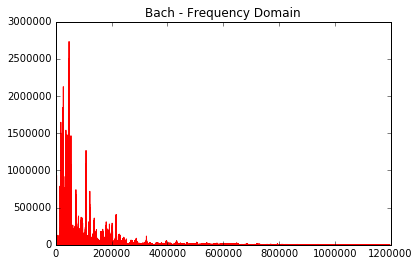

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read('a2002011001-e02.wav') # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
plt.title("Bach - Frequency Domain")
plt.show()


In [143]:
import cmath
import pandas as pd
import math
import numpy as np

def fftTransform(wavFile, slice):
    fs, data = wavfile.read(wavFile) # load the data
    a = data.T[0] # this is a two channel soundtrack, I get the first track
    b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(b) # calculate fourier transform (complex numbers list)
    d = len(c)/2  # you only need half of the fft list (real signal symmetry)
    data = pd.DataFrame([{"amplitude": x.real, "frequency": x.imag} for x in c])
    data[d-1:]
    data["slice"] = slice
    data["freqBand"] = data.frequency.map(lambda x: np.floor(x /10000) * 10000)
    dat2 = data.dropna().groupby("freqBand").mean().reset_index()
    dat3 = dat2.pivot(values='amplitude', index='slice', columns = 'freqBand')
    return dat3

dat = fftTransform('a2002011001-e02.wav', 1)
dat
# dat["freqBand"] = dat.frequency.map(lambda x: np.floor(x /1000) * 1000)
# dat2 = dat.dropna().groupby("freqBand").mean().reset_index()
# dat3 = dat2.pivot(values='amplitude', index='slice', columns = 'freqBand')



freqBand,-2310000.0,-2200000.0,-2140000.0,-2040000.0,-1980000.0,-1930000.0,-1910000.0,-1880000.0,-1830000.0,-1790000.0,...,1780000.0,1820000.0,1870000.0,1900000.0,1920000.0,1970000.0,2030000.0,2130000.0,2190000.0,2300000.0
slice,,,,,,,,,,,,,,,,,,,,,
1,1.474192e+06,107204.522978,875435.956266,810488.178284,1.292834e+06,18647.151233,330075.586474,528130.206614,574741.869121,-944507.116573,...,-944507.116573,574741.869121,528130.206614,330075.586474,18647.151233,1.292834e+06,810488.178284,875435.956266,107204.522978,1.474192e+06


In [123]:
dat["freqBand"] = dat.frequency.map(lambda x: np.floor(x /1000) * 1000)

dat2 = dat.dropna().groupby("freqBand").mean().reset_index()
dat2
dat3 = dat2.pivot(values='amplitude', index='slice', columns = 'freqBand')
dat3.reset_index()

# dat2
# table = pd.pivot_table(dat2, values='amplitude', columns='freqBand', aggfunc=np.sum)
# table

freqBand,slice,-2301000.0,-2196000.0,-2136000.0,-2036000.0,-1977000.0,-1926000.0,-1902000.0,-1880000.0,-1873000.0,...,1825000.0,1872000.0,1879000.0,1901000.0,1925000.0,1976000.0,2035000.0,2135000.0,2195000.0,2300000.0
0,1,1.474192e+06,107204.522978,875435.956266,810488.178284,1.292834e+06,18647.151233,330075.586474,-410565.546199,1.466826e+06,...,608339.812843,1.466826e+06,-410565.546199,330075.586474,18647.151233,1.292834e+06,810488.178284,875435.956266,107204.522978,1.474192e+06


In [125]:
# Read in a WAV and find the freq's
import pyaudio
import wave
import numpy as np

chunk = 2048

# open up a wave
wf = wave.open('a2002011001-e02.wav', 'rb')
swidth = wf.getsampwidth()
RATE = wf.getframerate()
# use a Blackman window
window = np.blackman(chunk)
# open stream
p = pyaudio.PyAudio()
stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = RATE,
                output = True)

# read some data
data = wf.readframes(chunk)
# play stream and find the frequency of each chunk
while len(data) == chunk*swidth:
    # write data out to the audio stream
    stream.write(data)
    # unpack the data and times by the hamming window
    indata = np.array(wave.struct.unpack("%dh"%(len(data)/swidth),\
                                         data))*window
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2
    # find the maximum
    which = fftData[1:].argmax() + 1
    # use quadratic interpolation around the max
    if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    else:
        thefreq = which*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    # read some more data
    data = wf.readframes(chunk)
if data:
    stream.write(data)
stream.close()
p.terminate()

In [135]:
math.exp(10)

22026.465794806718